## Sports Image Classification

#### Load Packages and Image Data

In [7]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.applications import EfficientNetB0

In [16]:
os. getcwd()
PATH = "C:\\Users\\atrum\\MSBA\\AI\\image_data"
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
validation_dir = os.path.join(PATH, 'valid')

In [17]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=(256,256),
    labels='inferred',
    label_mode='int',
    batch_size=32
)
test_ds=keras.utils.image_dataset_from_directory(
    directory=test_dir,
    image_size=(256,256),
    labels='inferred',
    label_mode='int',
    batch_size=32
)
valid_ds=keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    image_size=(256,256),
    labels='inferred',
    label_mode='int',
    batch_size=32
)

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


#### Create Sequential Model

In [18]:
base_model=EfficientNetB0(include_top=False,input_shape=(256,256,3),weights='imagenet')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
for layer in base_model.layers:
    layer.trainable=False

In [20]:
model=Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(keras.layers.Dropout(0.1))
model.add(Dense(100,activation='softmax'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
              metrics=['accuracy'])
history=model.fit(train_ds,validation_data=test_ds,epochs=5)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 255s 586ms/step - accuracy: 0.7763 - loss: 1.0926 - val_accuracy: 0.9360 - val_loss: 0.2619
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 244s 577ms/step - accuracy: 0.9747 - loss: 0.1849 - val_accuracy: 0.9580 - val_loss: 0.2124
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 244s 578ms/step - accuracy: 0.9969 - loss: 0.0445 - val_accuracy: 0.9480 - val_loss: 0.1874
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 242s 574ms/step - accuracy: 0.9987 - loss: 0.0142 - val_accuracy: 0.9640 - val_loss: 0.1654
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 247s 585ms/step - accuracy: 0.9992 - loss: 0.0075 - val_accuracy: 0.9620 - val_loss: 0.1581


#### Evaluate and Predict

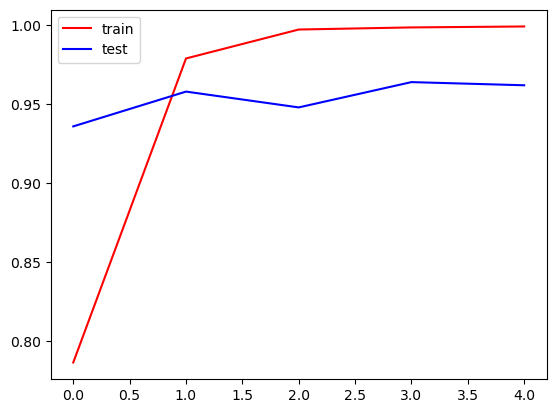

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [40]:
subdirs = [x[0] for x in os.walk('.')]
print(subdirs)

['.', '.\\.ipynb_checkpoints', '.\\image_data', '.\\image_data\\test', '.\\image_data\\test\\air hockey', '.\\image_data\\test\\ampute football', '.\\image_data\\test\\archery', '.\\image_data\\test\\arm wrestling', '.\\image_data\\test\\axe throwing', '.\\image_data\\test\\balance beam', '.\\image_data\\test\\barell racing', '.\\image_data\\test\\baseball', '.\\image_data\\test\\basketball', '.\\image_data\\test\\baton twirling', '.\\image_data\\test\\bike polo', '.\\image_data\\test\\billiards', '.\\image_data\\test\\bmx', '.\\image_data\\test\\bobsled', '.\\image_data\\test\\bowling', '.\\image_data\\test\\boxing', '.\\image_data\\test\\bull riding', '.\\image_data\\test\\bungee jumping', '.\\image_data\\test\\canoe slamon', '.\\image_data\\test\\cheerleading', '.\\image_data\\test\\chuckwagon racing', '.\\image_data\\test\\cricket', '.\\image_data\\test\\croquet', '.\\image_data\\test\\curling', '.\\image_data\\test\\disc golf', '.\\image_data\\test\\fencing', '.\\image_data\\test\

In [58]:
import re

labels =[]
for dirs in subdirs:
    sport = re.findall(r"valid\\(\w+\s*\w*)", dirs)
    try:
        labels.append(sport[0])
    except:
        _ = 0
print(labels)
print(len(labels))

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating', 'figure skating', 'figure skating', 'fly fishing', 'football', 'formula 1', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'roller derby', 'rollerblade ra

In [62]:
from keras.preprocessing import image
img = image.load_img('hockey.jpg', target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


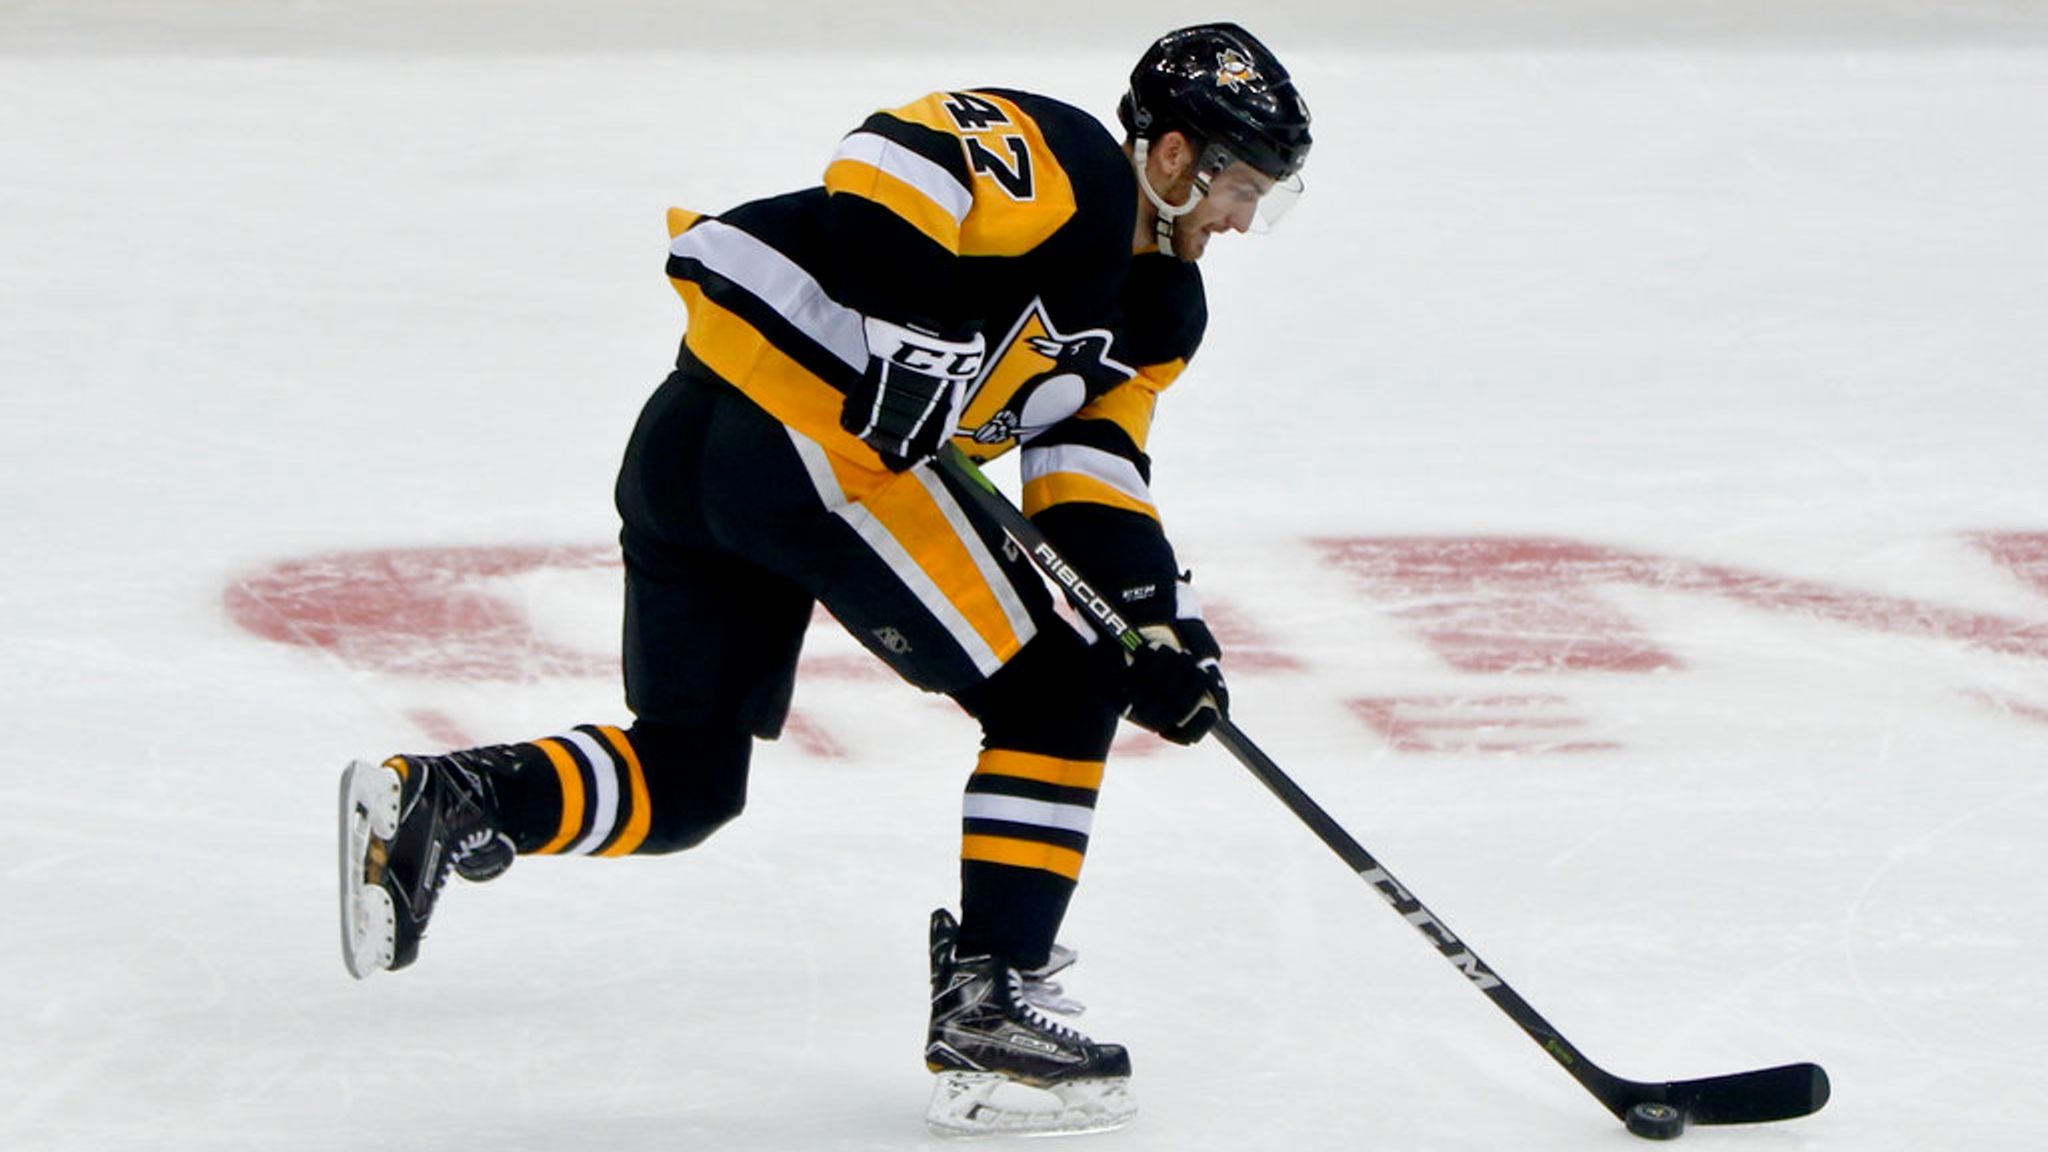

In [61]:
from IPython import display
display.Image("https://e3.365dm.com/23/10/2048x1152/skynews-adam-johnson-ice-hockey_6340231.jpg")

In [63]:
print(np.argmax(pred))
print(labels[np.argmax(pred)]) 

41
hockey


In [64]:
from keras.preprocessing import image
img = image.load_img('man_fh.jpg', target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


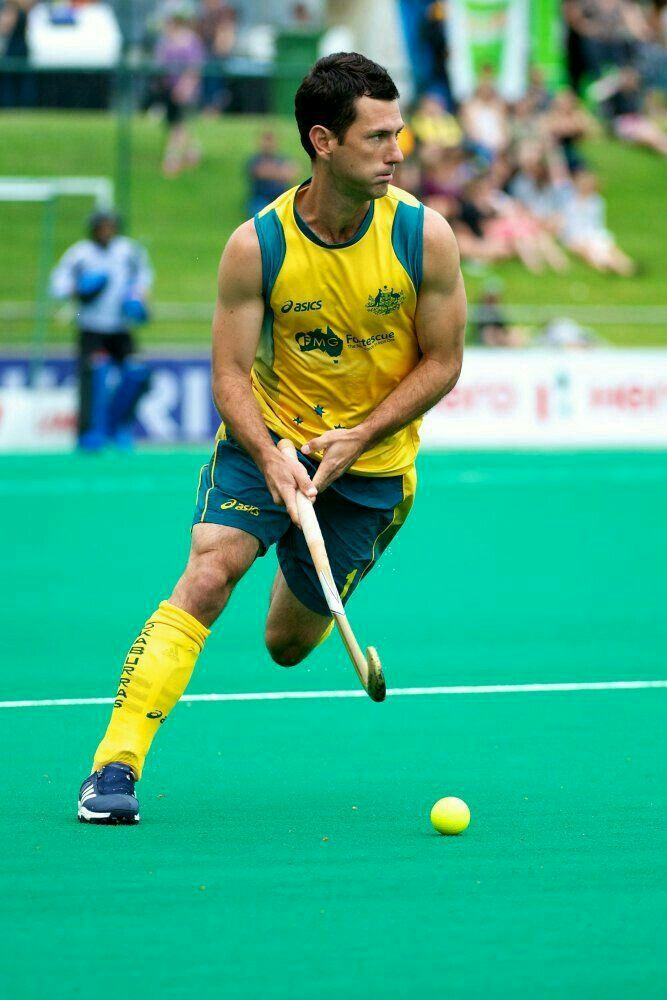

In [66]:
display.Image("https://i.pinimg.com/originals/c8/26/58/c82658cdab1621c394077cdbb89c566f.jpg")

In [65]:
print(np.argmax(pred))
print(labels[np.argmax(pred)])

26
field hockey


In [70]:
from keras.preprocessing import image
img = image.load_img('wc_bball.jpg', target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


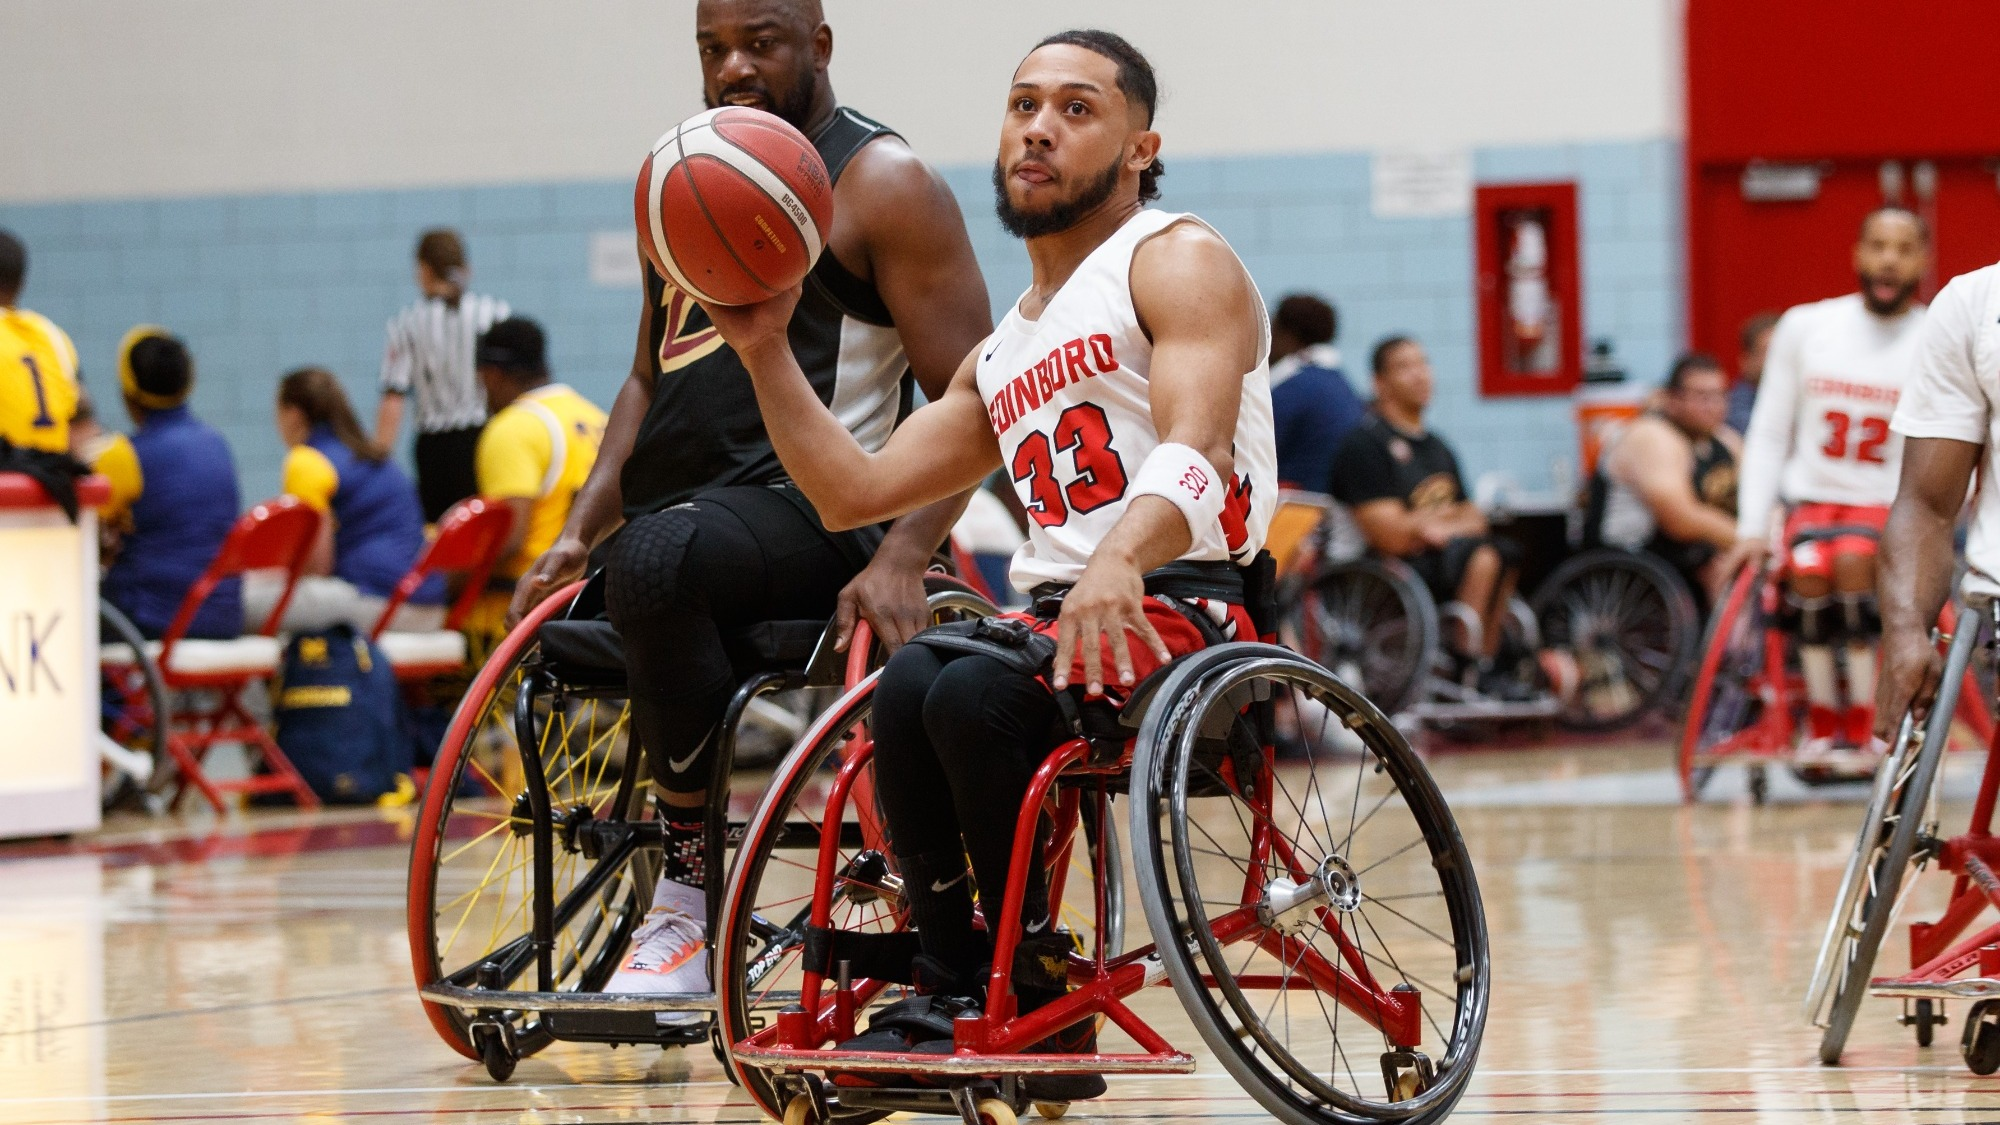

In [72]:
display.Image("https://gofightingscots.com/images/2023/3/3/11.5.2022_Edinboro_WCBB_0711_8ZabX.jpg")

In [71]:
print(np.argmax(pred))
print(labels[np.argmax(pred)])

97
wheelchair basketball


#### Loose example of bias

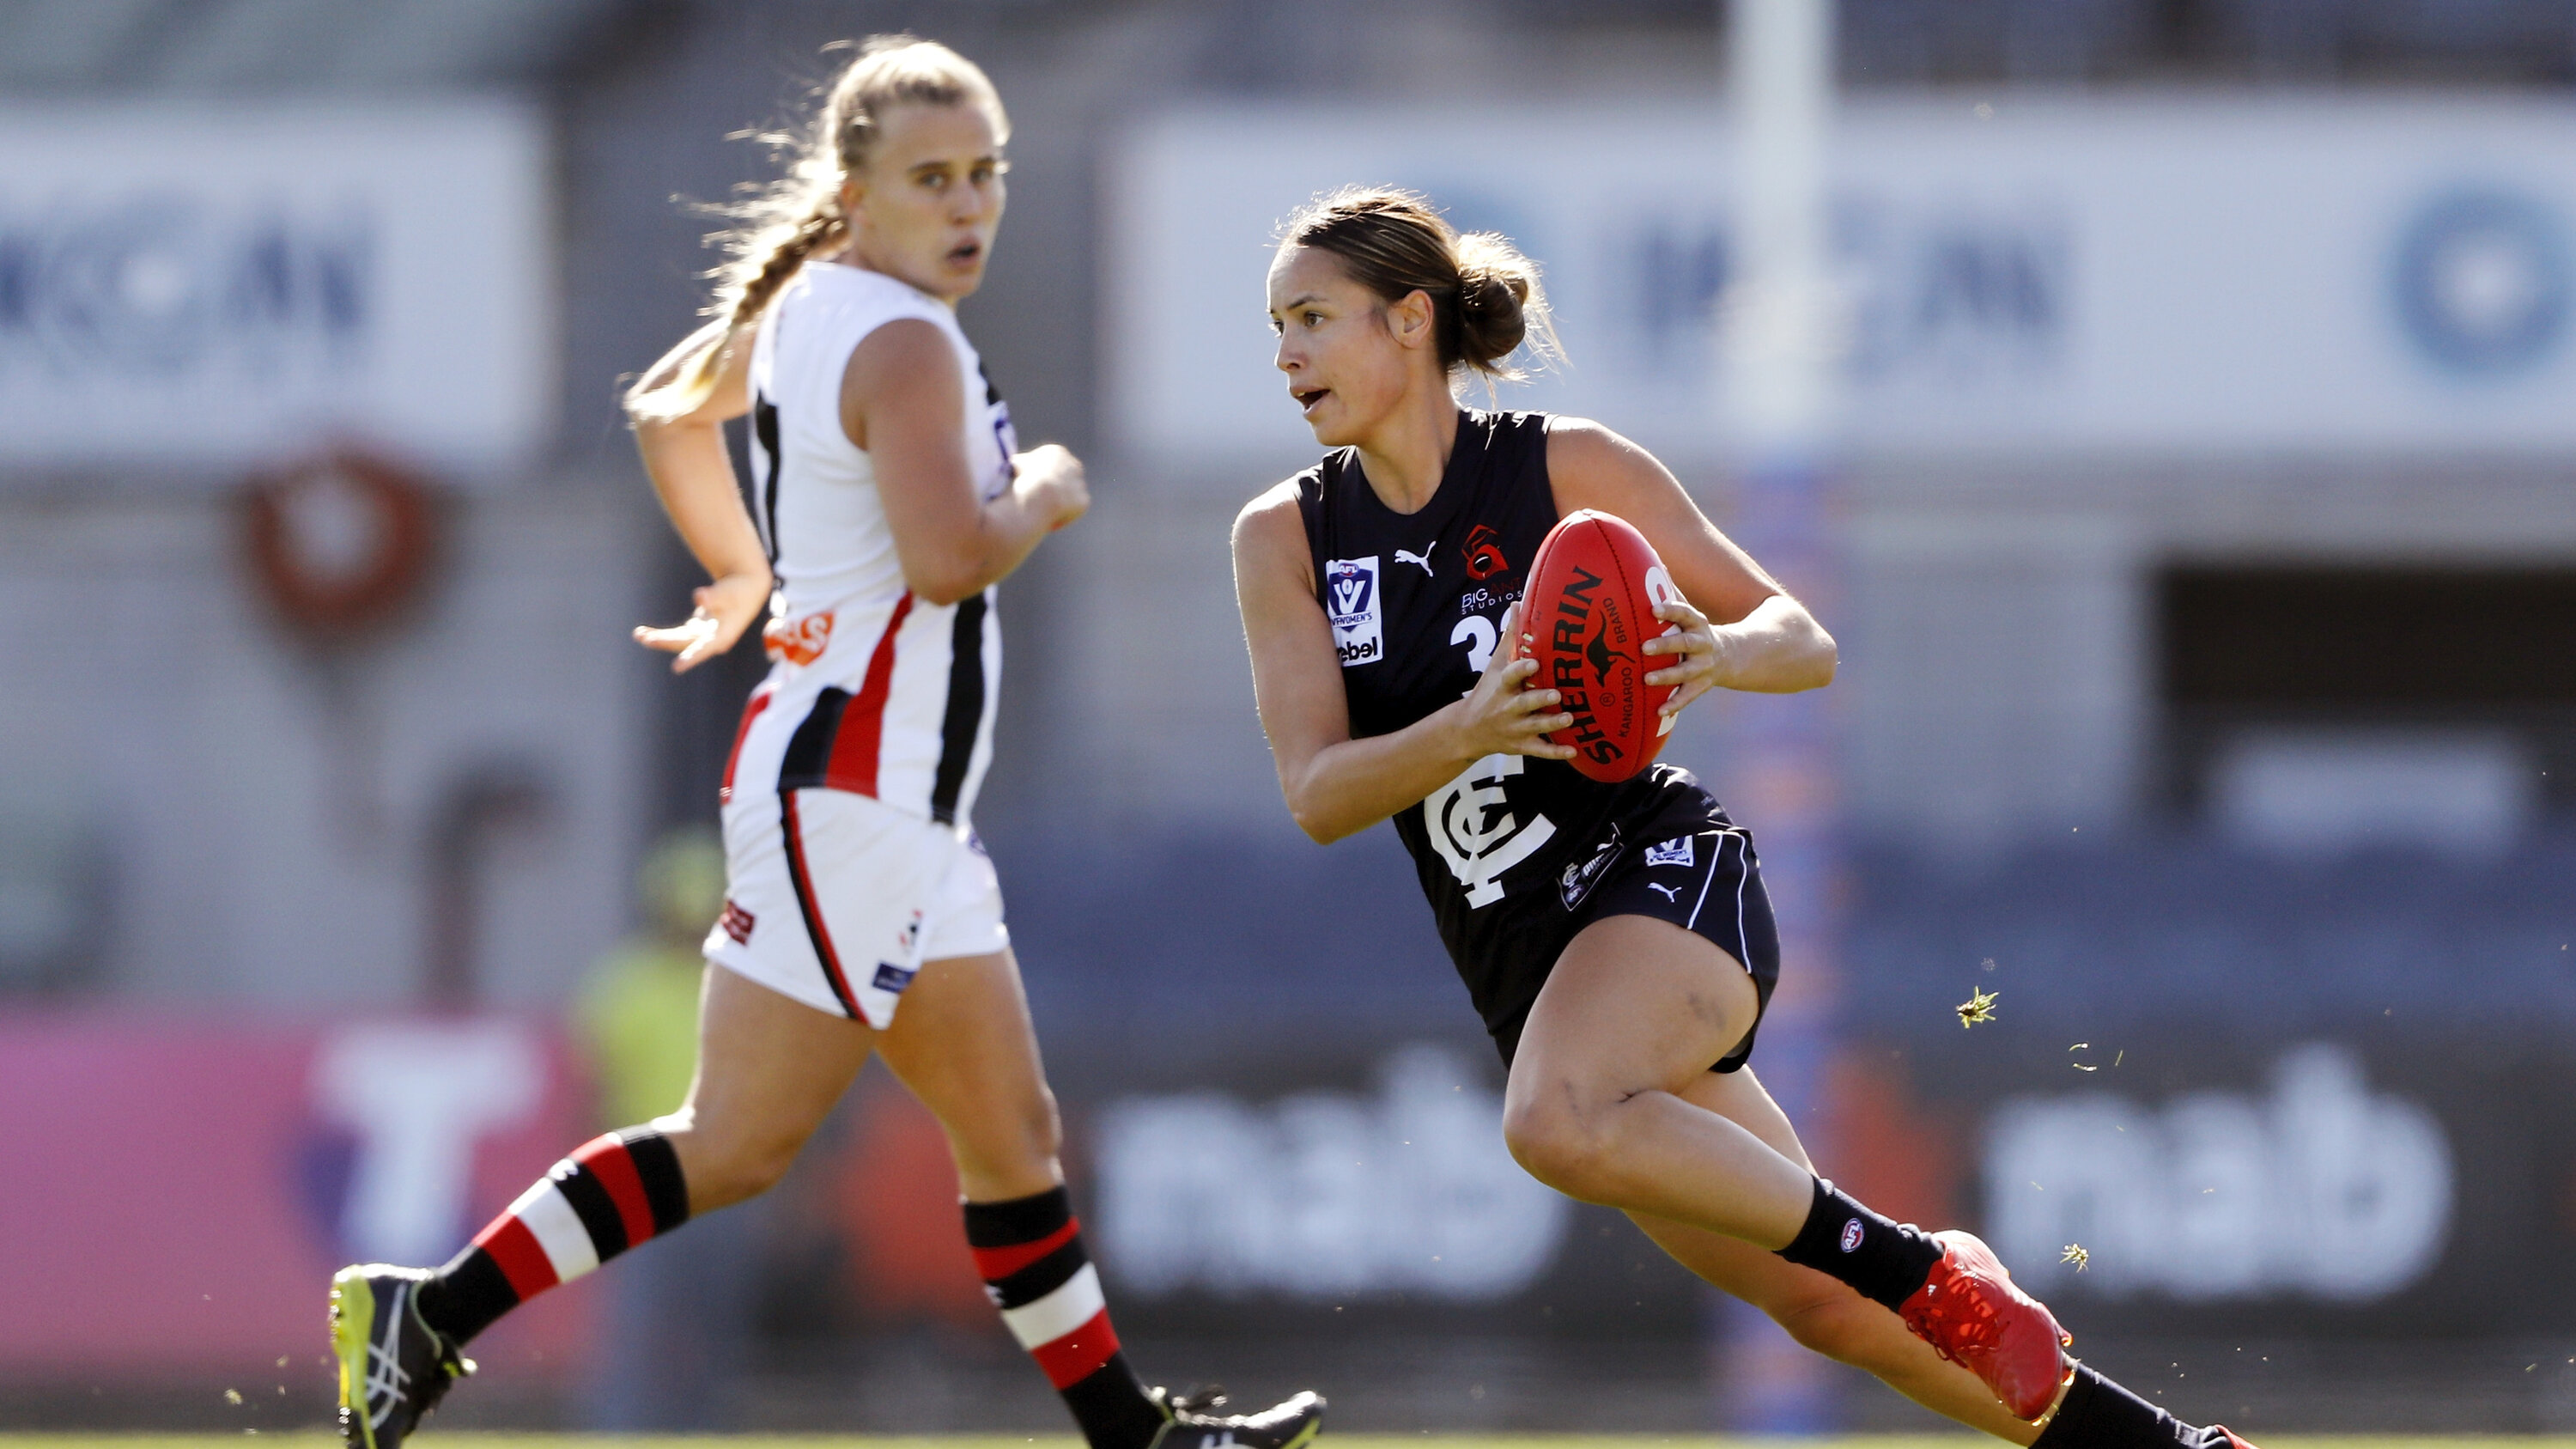

In [82]:
display.Image("https://static01.nyt.com/images/2023/08/19/sports/19wwc-australia-women/19wwc-australia-women-videoSixteenByNine3000.jpg")

In [79]:
from keras.preprocessing import image
img = image.load_img('women_rugby.jpg', target_size=(256, 256)) #https://i.pinimg.com/736x/a6/52/a2/a652a2d1a51d709ea582314a16377add.jpg
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(images)
print(np.argmax(pred))
print(labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
8
basketball


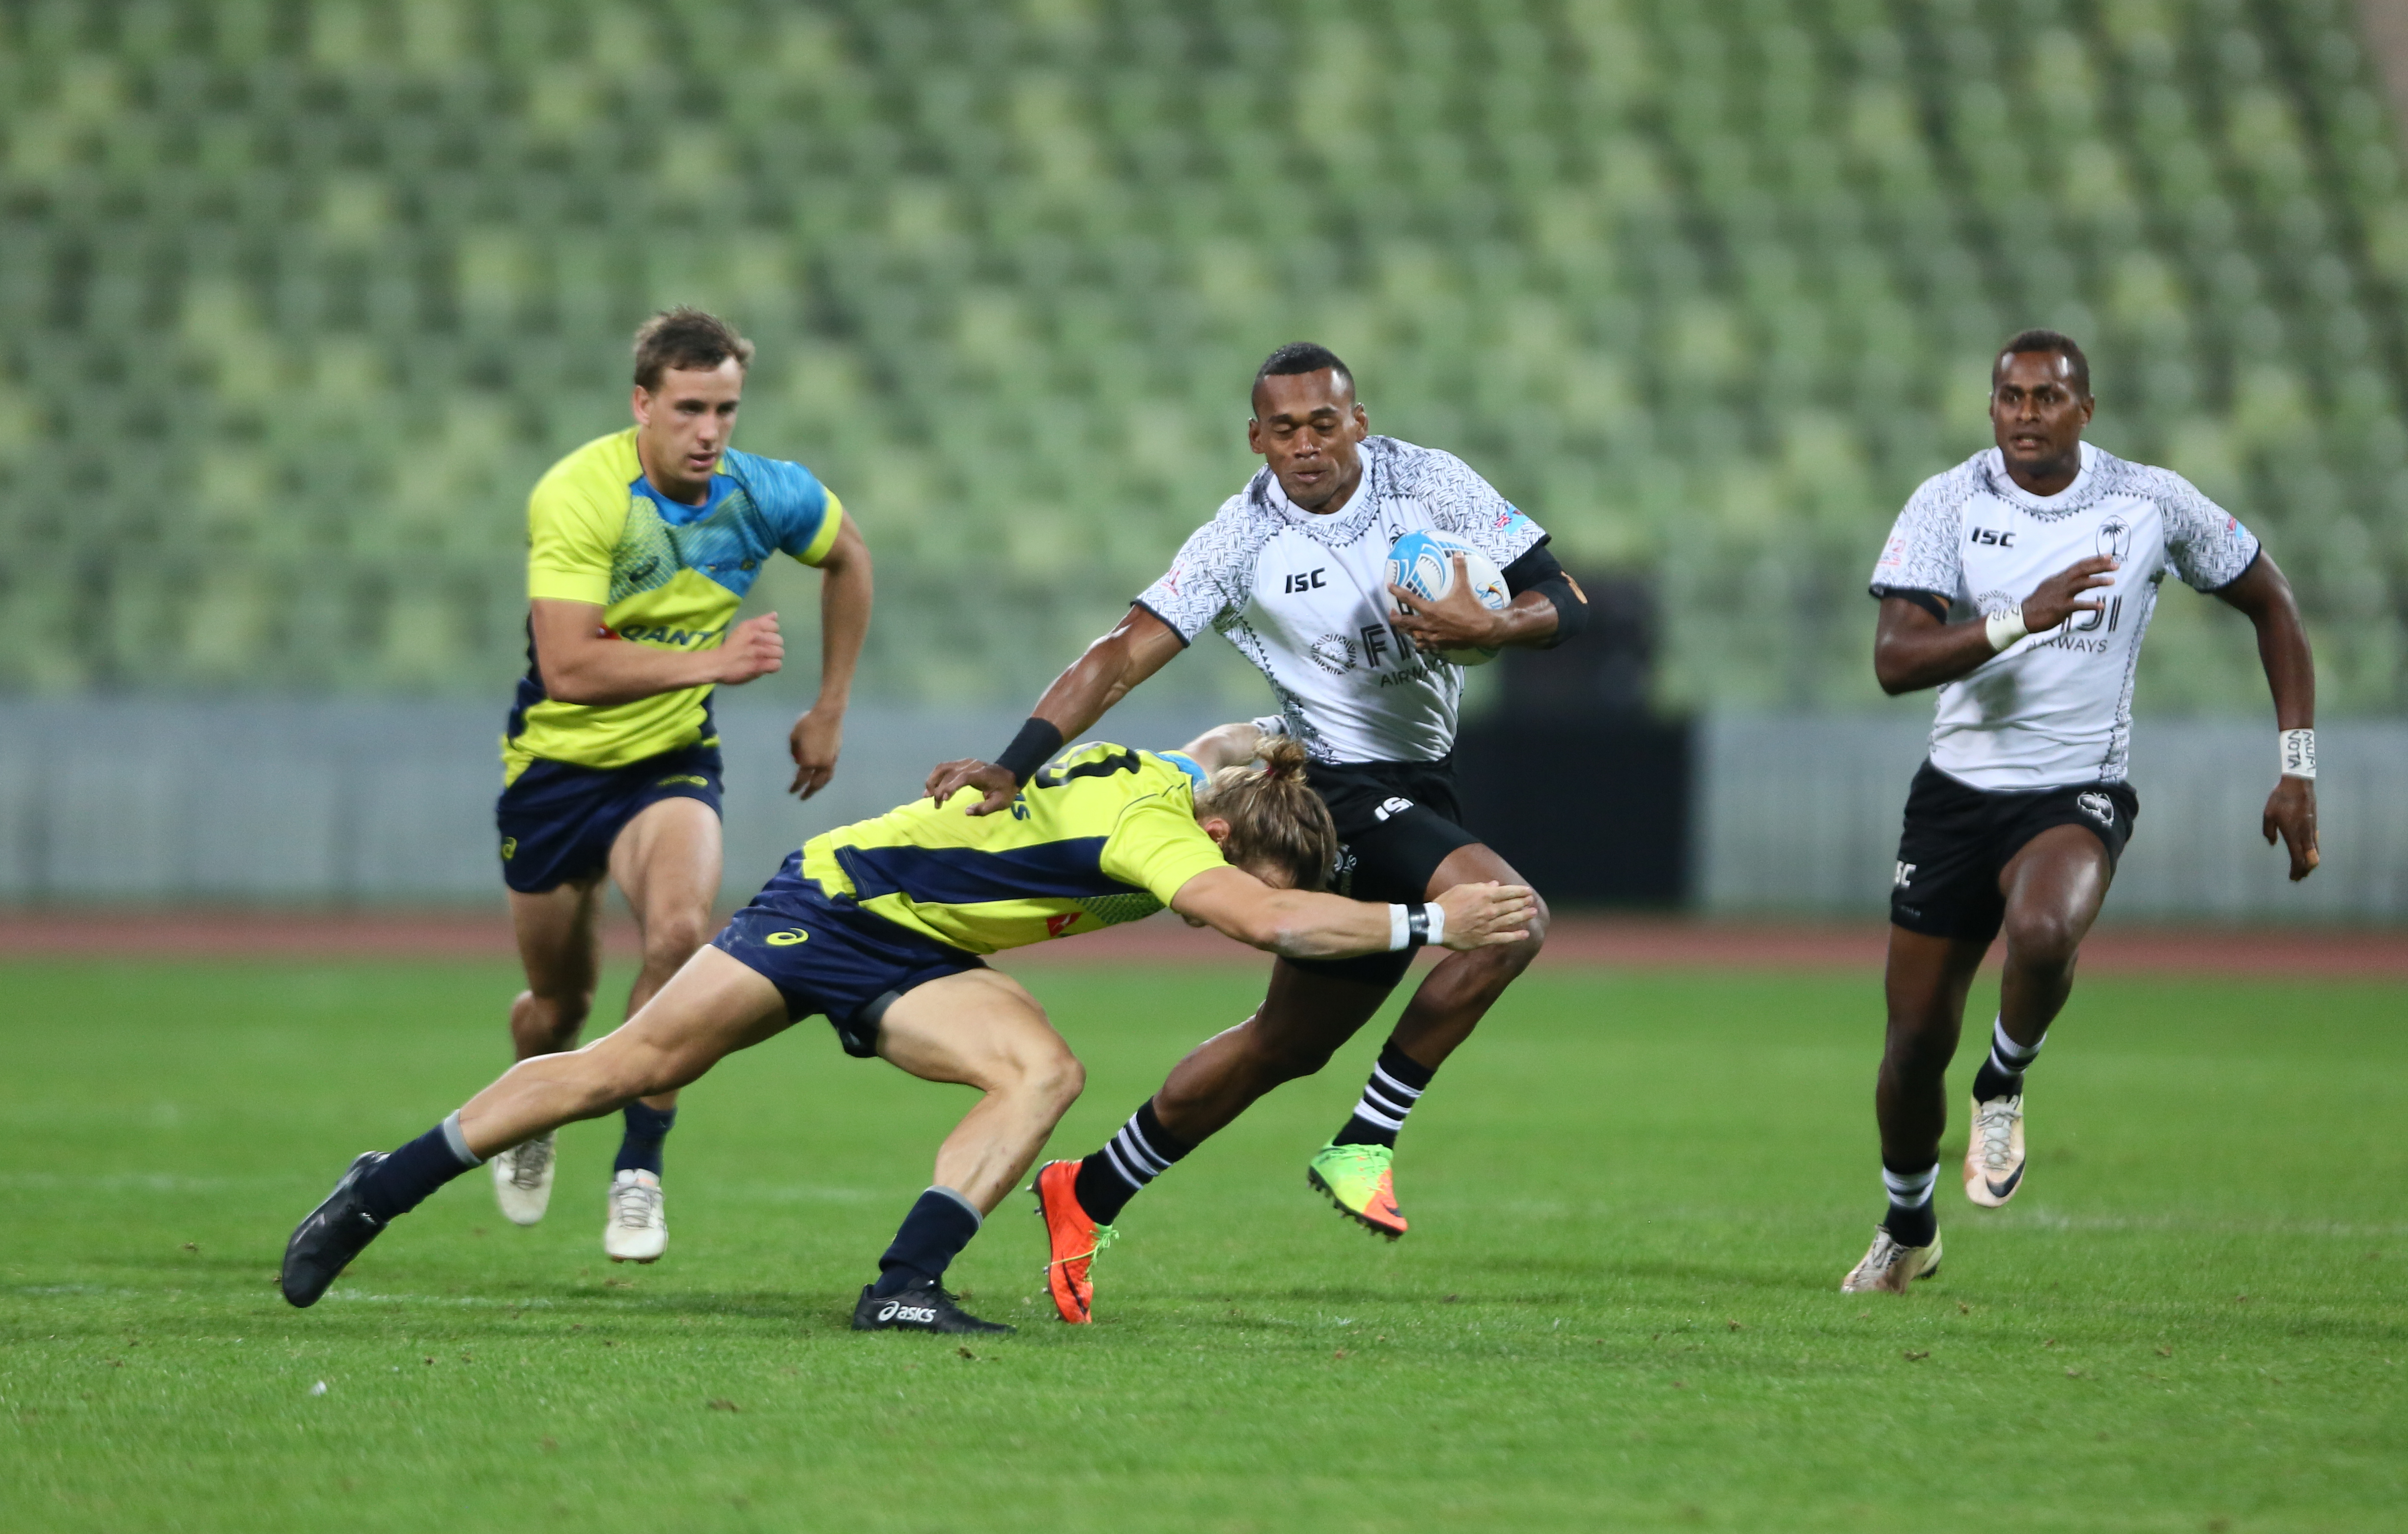

In [81]:
display.Image("https://upload.wikimedia.org/wikipedia/commons/2/23/Fiji_Australia_Oktoberfest_7s_3163.jpg")

In [80]:
from keras.preprocessing import image
img = image.load_img('rugby.jpg', target_size=(256, 256)) #https://i.pinimg.com/736x/a6/52/a2/a652a2d1a51d709ea582314a16377add.jpg
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(images)
print(np.argmax(pred))
print(labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
71
rugby
